In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import itertools
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [ ]:
column_mapping = {
    'fixed acidity': 'fiksna kiselost',
    'volatile acidity': 'isparljiva kiselost',
    'citric acid': 'limunska kiselina',
    'residual sugar': 'rezidualni šećer',
    'chlorides': 'hloridi',
    'free sulfur dioxide': 'slobodni sumpor-dioksid',
    'total sulfur dioxide': 'ukupni sumpor-dioksid',
    'density': 'gustina',
    'pH': 'pH',
    'sulphates': 'sulfati',
    'alcohol': 'alkohol',
    'quality': 'kvalitet'
}

df = df.rename(columns=column_mapping)

In [ ]:
df['klasa kvaliteta'] = df['kvalitet'].apply(lambda q: 0 if q <= 4 else (1 if q <= 6 else 2))
df = df.drop('kvalitet', axis=1)
df.head()

,fiksna kiselost,isparljiva kiselost,limunska kiselina,rezidualni šećer,hloridi,slobodni sumpor-dioksid,ukupni sumpor-dioksid,gustina,pH,sulfati,alkohol,klasa kvaliteta
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
class_counts = df['klasa kvaliteta'].value_counts().sort_index()
print(class_counts)

0      63
1    1319
2     217
Name: klasa kvaliteta, dtype: int64


In [ ]:
X = df.drop(columns=['klasa kvaliteta'], axis=1)
y = df['klasa kvaliteta'].values

In [ ]:
# bez sinteticki generisanih podataka i skaliranja, tačnost modela je bila manja,
# a preciznost za klasu 0 Random Forest modela je bila samo 0.2

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.25, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_y_pred = rf_classifier.predict(X_test)

In [ ]:
#Klasifikacioni izvještaj za Random Forest

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       329
           1       0.93      0.83      0.88       360
           2       0.89      0.97      0.93       301

    accuracy                           0.92       990
   macro avg       0.92      0.92      0.92       990
weighted avg       0.92      0.92      0.92       990



In [ ]:
X_train.shape

(2967, 11)

In [ ]:
X_test.shape

(990, 11)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

gb_y_pred = gb_classifier.predict(X_test)

In [ ]:
#Klasifikacioni izvještaj za Gradient Boosting

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,gb_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       329
           1       0.93      0.81      0.86       360
           2       0.86      0.95      0.90       301

    accuracy                           0.90       990
   macro avg       0.90      0.90      0.90       990
weighted avg       0.90      0.90      0.90       990



In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

svm_y_pred = svm_classifier.predict(X_test)

In [ ]:
#Klasifikacioni izvještaj za SVM model

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       329
           1       0.88      0.69      0.77       360
           2       0.85      0.92      0.88       301

    accuracy                           0.85       990
   macro avg       0.85      0.85      0.85       990
weighted avg       0.85      0.85      0.84       990



Text(95.72222222222221, 0.5, 'Stvarno')

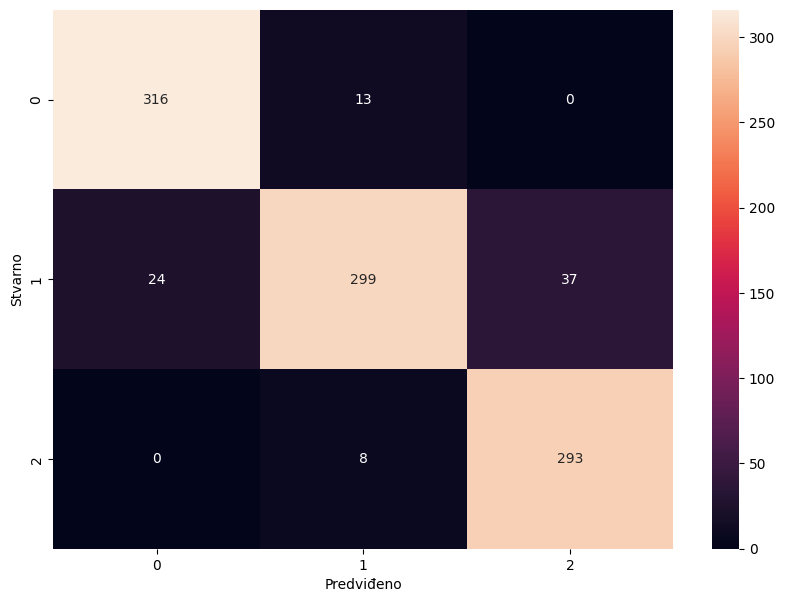

In [ ]:
# Matrica zabune za Random Forest

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=rf_y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')